# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train.shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

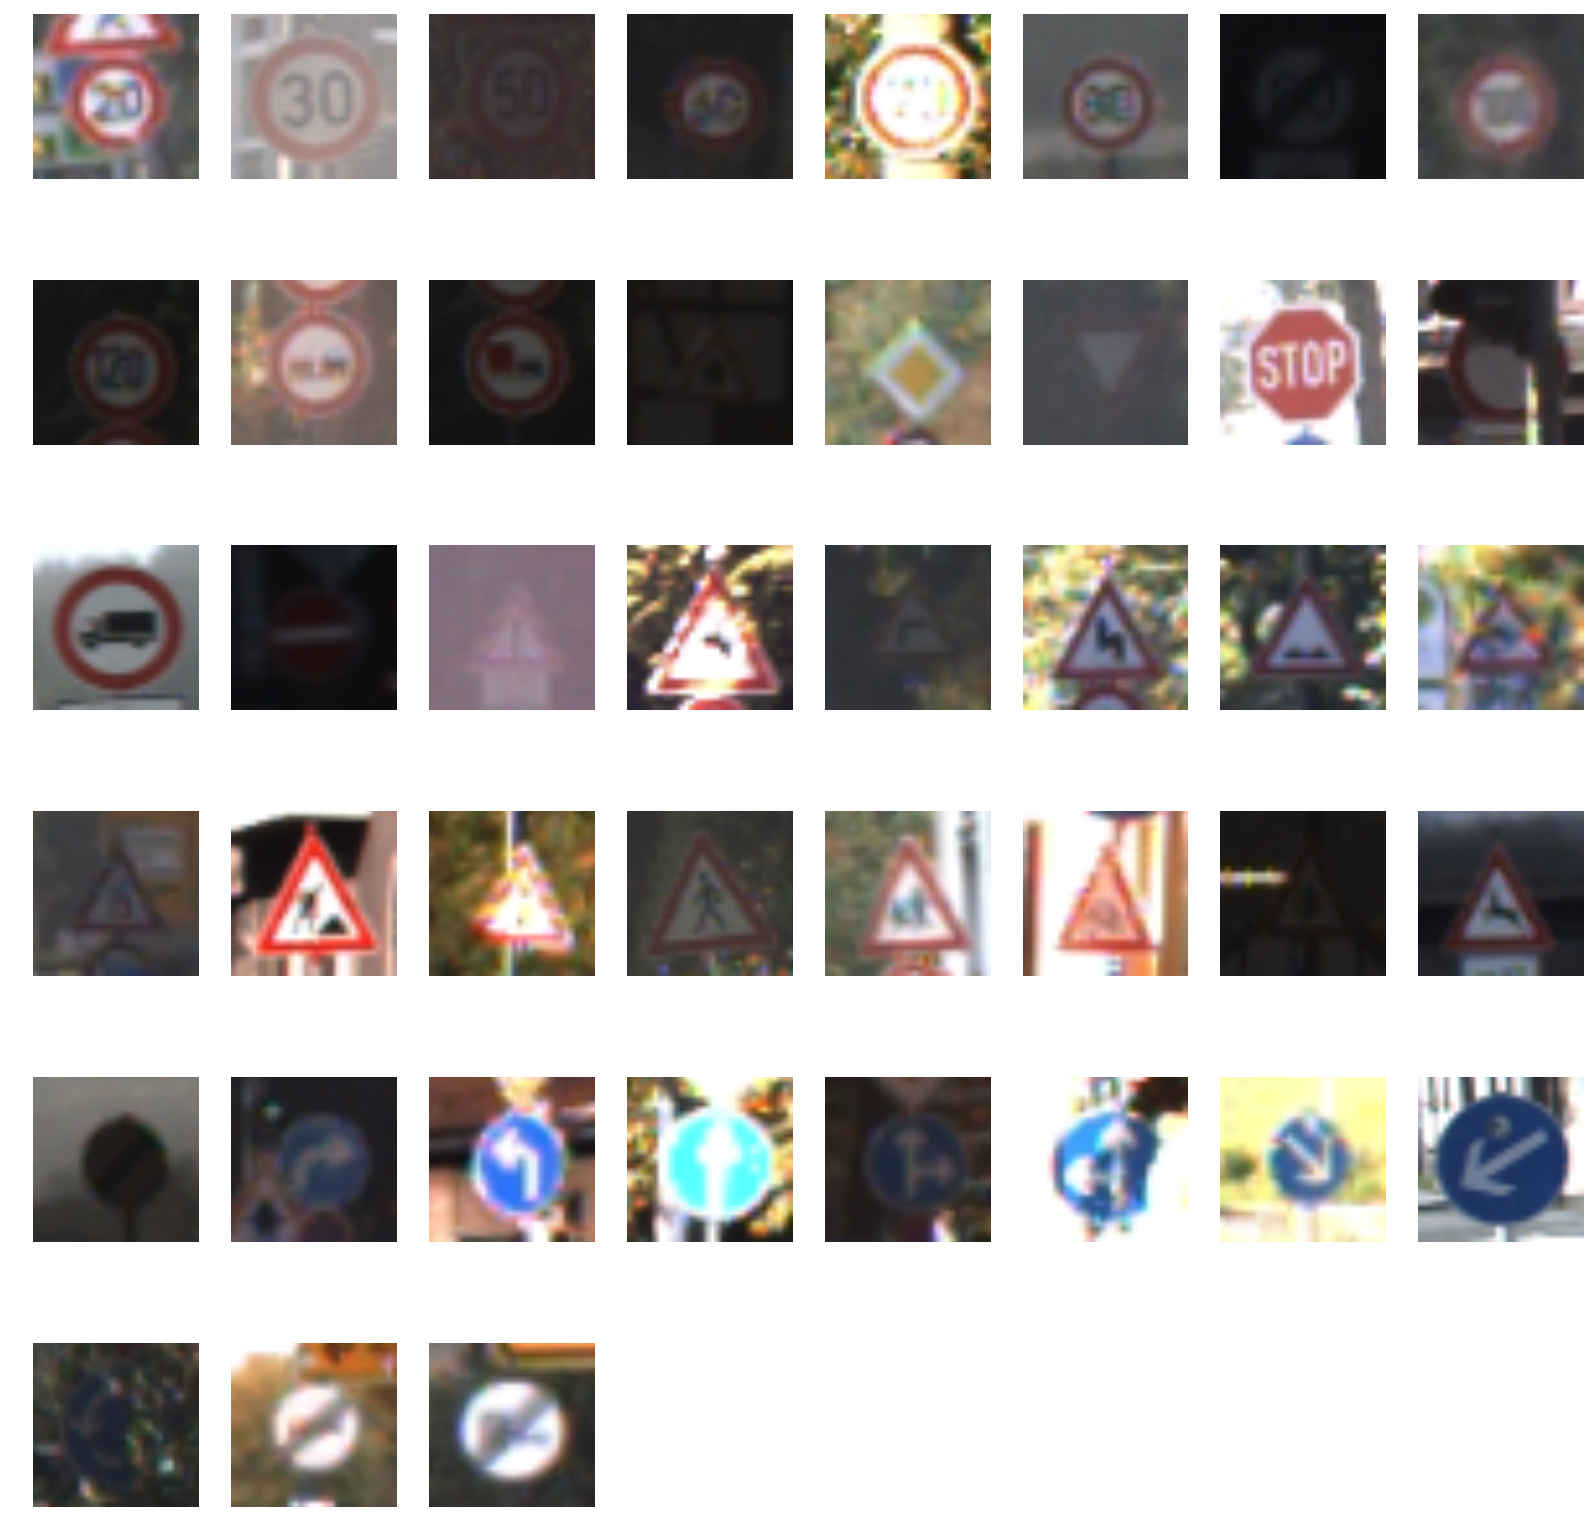

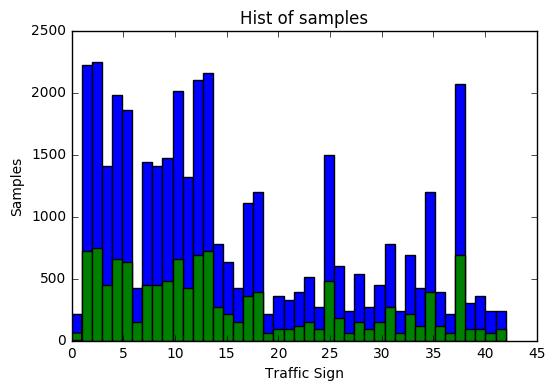

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# A quick and dirty for loop to show an example of each traffic sign by label (0-42)
# This loop finds the first instance for each traffic sign
# TODO: Add a nice label that correlates the image to the name defined in the csv
plt.figure(figsize=(20,20))
for traffic_sign in range(n_classes):
    for index in range(n_train):
        if traffic_sign == (y_train[index]):
            image = X_train[index].squeeze()
            plt.subplot(6,8,int(traffic_sign)+1)
            plt.axis('off')
            plt.imshow(image)
            break
plt.show()


# Plot histogram to get a feel for distribution of data
# Again this is quick a dirty so I overlay the testing distribution on top of training distribution
# This looks like the data is distributed evenly among the training to testing samples
plt.hist(y_train, bins=n_classes)
plt.hist(y_test, bins=n_classes)
plt.title("Hist of samples")
plt.xlabel("Traffic Sign")
plt.ylabel("Samples")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2
X_train, y_train = shuffle(X_train, y_train)
X_train_original = X_train
X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))

#X_train = (X_train - X_train.mean()) / (np.std(X_train))
#X_test = (X_test - X_test.mean()) / (np.std(X_test))

#from numpy import linalg as la
#X_train = la.norm(X_train, axis=3, keepdims=True)
#X_test = la.norm(X_test, axis=3, keepdims=True)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I preprocessed the data by using the formala given in class. This worked very well for my results. I tried a few other ways shown above, but the resultant output generated similiar final results for accuracy or it was at the other end of the scale. I didn't convert the data to grayscale because it seemed to lose too much information when I performed my testing.

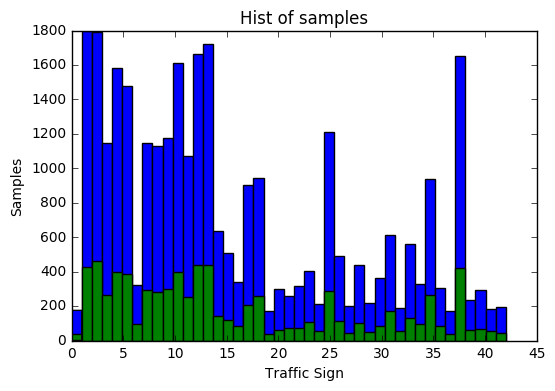

In [5]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=17)

plt.hist(y_train, bins=n_classes)
plt.hist(y_validation, bins=n_classes)
plt.title("Hist of samples")
plt.xlabel("Traffic Sign")
plt.ylabel("Samples")

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
In general, I was taught to split the data 60%/20%/20% (training/cv/testing). I just split the training data here at 80%/20% since testing data was already provided. For this data and the total samples, this should be sufficient. The training data was also shuffled to not skew the learning process and provide better accuracy. 

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

def calculate_weights_and_bias(x, shape_parameters, output_dimension):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    Layer_Weights = tf.Variable(tf.truncated_normal(shape=shape_parameters, mean = mu, stddev = sigma))
    Layer_Bias = tf.Variable(tf.zeros(output_dimension))
    return Layer_Weights, Layer_Bias
    
def conv2d(x, Layer_Weights, Layer_Bias):
    return tf.nn.bias_add(tf.nn.conv2d(x, Layer_Weights, strides=[1,1,1,1], padding='VALID'), Layer_Bias)
    
def activate_layer(Layer):
    return tf.nn.elu(Layer)

def create_convolutional_layer_and_activate(x, shape_parameters, output_dimension):
    Layer_Weights, Layer_Bias = calculate_weights_and_bias(x, shape_parameters, output_dimension)
    Layer = conv2d(x, Layer_Weights, Layer_Bias)
    return activate_layer(Layer)

def create_fully_connected_layer(x, shape_parameters, output_dimension):
    Layer_Weights, Layer_Bias = calculate_weights_and_bias(x, shape_parameters, output_dimension)
    return tf.matmul(x, Layer_Weights) + Layer_Bias
    
def MyNet(x):    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 24x24x6.
    Layer1 = create_convolutional_layer_and_activate(x, (9,9,3,6), 6)
    
    # Layer 2: Convolutional. Input = 24x24x6. Output = 16x16x10.
    Layer2 = create_convolutional_layer_and_activate(Layer1, (9,9,6,10), 10)

    # Layer 3: Convolutional. Input = 16x16x10. Output = 8x8x12.
    Layer3 = create_convolutional_layer_and_activate(Layer2, (9,9,10,12), 12)
    
    # Flatten. Input = 8x8x12. Output = 768.
    Layer3 = flatten(Layer3)
    
    # Layer 4: Fully Connected. Input = 768. Output = 120.
    Layer4 = create_fully_connected_layer(Layer3, (768,120), 120)
    Layer4 = activate_layer(Layer4)
    
    # Layer 5: Fully Connected. Input = 120. Output = 43.
    logits = create_fully_connected_layer(Layer4, (120,43), 43)
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
My architecture is an all convolution net using ELUs as my activation unit. I reviewed what tensor flow options were available to me via the documentation and started to experiment with different numbers of layers, number of conv. layers vs. fc layers, number of filters, strides, max/mean pooling, etc. and decided on this architecture.

For my architecture I made three key choices based on research and trial and error.

(A) I decided on all convolutional net to expand on what I've learned so far. Essentially this replaces the max-pooling step and the same if not better results can be achieved (by increasing the stride). See Ref 1.

(B) I decided on using ELU based on the overal performance of accuracy and in theory faster learning. I did not time the latter part, but the accuracy did improve by at least a few percentage points. See Ref 2.

(C) Although regularization is your friend, I found in this case that it was more detrimental than helpful. Accuracy was in the single digits so I chose to not use dropout or other methods of regularization. I tried dropout with 50% as mentioned in class and tf.nn.l2_normalize(W, [-1,1]).  See Ref 3.

I believe there is room for improvement for this architecture, but as I get more experienced I will have better intuition on my approach.



**References:**

(1) "Striving for Simplicity: The All Convolutional Net" https://arxiv.org/abs/1412.6806

(2) "Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs)" https://arxiv.org/abs/1511.07289

(3) "The Art of Regularization" https://greydanus.github.io/2016/09/05/regularization/


**Input:** This architecture accepts a 32x32x3 image as input.


**Architecture:**

Layer 1: Convolutional; Input = 32x32x3; Output = 24x24x6; Activation: ELU

Layer 2: Convolutional; Input = 24x24x6; Output = 16x16x10; Activation: ELU

Layer 3: Convolutional; Input = 16x16x10; Output = 8x8x12; Activation: ELU; Flatten. Input = 8x8x12. Output = 768.

Layer 4: Fully Connected; Input = 768; Output = 120; Activation: ELU

Layer 5: Fully Connected; Input = 120; Output = 43.

**Output:** Return the result of the 2nd fully connected layer.

In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

LEARNING_RATE = 0.001
EPOCHS = 15
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

# Setup pipeline
one_hot_y = tf.one_hot(y, 43)
logits = MyNet(x)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE).minimize(loss)
prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

# Standard initialize all variables
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
    
print("Training...")
for n in range(EPOCHS):
    for offset in range(0, len(X_train), BATCH_SIZE):
        batch_x, batch_y = X_train[offset:offset + BATCH_SIZE], y_train[offset:offset + BATCH_SIZE]
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

    total_cv_accuracy = 0
    for offset in range(0, len(X_validation), BATCH_SIZE):
        batch_x, batch_y = X_validation[offset:offset+BATCH_SIZE], y_validation[offset:offset+BATCH_SIZE]
        batch_accuracy = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
        total_cv_accuracy += (batch_accuracy * len(batch_x))

    print("EPOCH {} ".format(n+1) + "Validation Accuracy = {:.3f}".format(total_cv_accuracy / len(X_validation)))
print("Training completed.")    

Training...
EPOCH 1 Validation Accuracy = 0.951
EPOCH 2 Validation Accuracy = 0.972
EPOCH 3 Validation Accuracy = 0.975
EPOCH 4 Validation Accuracy = 0.976
EPOCH 5 Validation Accuracy = 0.981
EPOCH 6 Validation Accuracy = 0.983
EPOCH 7 Validation Accuracy = 0.982
EPOCH 8 Validation Accuracy = 0.984
EPOCH 9 Validation Accuracy = 0.986
EPOCH 10 Validation Accuracy = 0.985
EPOCH 11 Validation Accuracy = 0.983
EPOCH 12 Validation Accuracy = 0.983
EPOCH 13 Validation Accuracy = 0.985
EPOCH 14 Validation Accuracy = 0.987
EPOCH 15 Validation Accuracy = 0.986
Training completed.


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Optimizer = AdamOptimizer

BATCH_SIZE = 128

EPOCHS = 15

LEARNING_RATE = 0.001


I found this article which helped to describe hyperparameter recommendations.
"Practical Recommendations for Gradient-Based Training of Deep Architectures": https://arxiv.org/pdf/1206.5533v2.pdf

I chose AdamOptimzer via trial and error. It performed better than GradientOptimizer. It learns faster and is more forgiving with regards to hyperparameter tuning. AdamOptimizer uses momentum which helps to converge faster. This is also discussed in the above reference.

With regards to batch size, I tried 128 and 256 in particular. With Adamoptimzer, I found no discernable difference. With my model, 5 Epochs was plenty as it converged quickly to 97-98% with the cv data and 92% accuracy with the test set. A learning rate of 0.001 seemed to be optimal. Using a smaller value like 0.0001 or larger 0.003 lessened the accuracy.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I've been discussing my approach throughout the questions above, but I started my using LeNet as my first working model. Then I tried 3-9 layers and varied the parameters up to 4000 and up to 30 filters for a given layer. I found it was not necessary to have so many parameters or filters so I scaled it back to the above model which I felt had adequate performance.

As a side, it would be interesting to discuss these approaches collectively and learned what worked best given said approaches.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model predicted 3


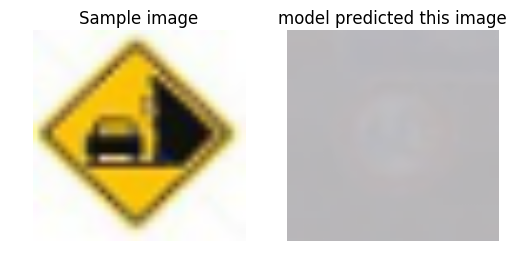

In [8]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

def compare_image_against_model(img):
    image = mpimg.imread(img)
    resized_image = cv2.resize(image, (32, 32)) 
    print('This image is:', type(resized_image), 'with dimesions:', resized_image.shape)
    predicted_plot = plt.subplot(121)
    predicted_plot.set_title("Sample image")
    plt.imshow(resized_image)
    plt.axis('off')
    classify = sess.run(tf.argmax(logits, 1), feed_dict={x: [resized_image]})
    print("model predicted", classify[0])
    
    for index in range(n_train):
        if classify[0] == (y_train[index]):
            image = X_train[index]
            reference_plot = plt.subplot(122)
            reference_plot.set_title("model predicted this image")
            plt.axis('off')
            plt.imshow(image)
            break
plt.show()
   
# The following six images were resized to 32x32 in Paint in Windows 10. It did a
# considerably better job at scaling the image than OpenCV.    
compare_image_against_model('Sample1b.jpg')

In [9]:
compare_image_against_model('Sample2b.jpg')

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model predicted 1


This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model predicted 34


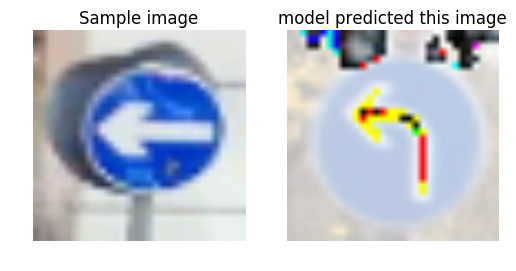

In [10]:
compare_image_against_model('Sample3b.jpg')

In [11]:
compare_image_against_model('Sample4b.jpg')

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model predicted 3


This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model predicted 1


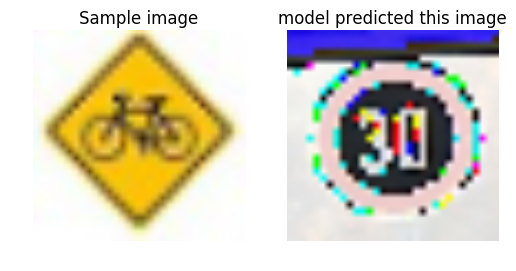

In [12]:
compare_image_against_model('Sample5b.jpg')

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model predicted 14


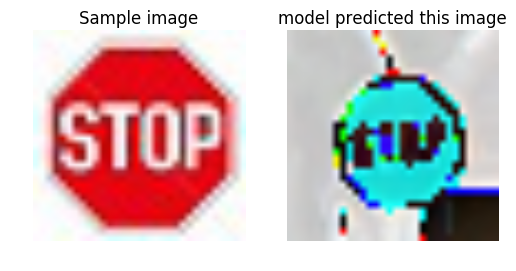

In [13]:
compare_image_against_model('Sample6b.jpg')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
The clear observation is if the image is not one of the traffic signs in the training set, then classification will be low. I noticed also that depending on how the image is resized will make a difference. Windows 10 version of Paint does a great job of scaling the image. These are displayed above while the images below are resized with OpenCV. 


This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model predicted 3


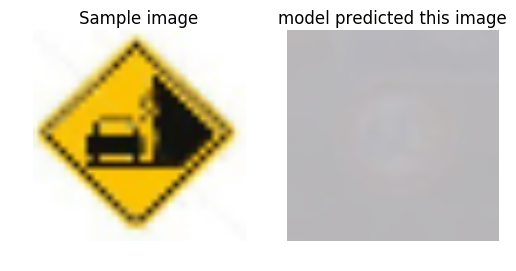

In [14]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
compare_image_against_model('Sample1.jpg')

In [15]:
compare_image_against_model('Sample2.jpg')

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model predicted 1


In [16]:
compare_image_against_model('Sample3.jpg')

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model predicted 34


In [17]:
compare_image_against_model('Sample4.jpg')

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model predicted 3


This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model predicted 1


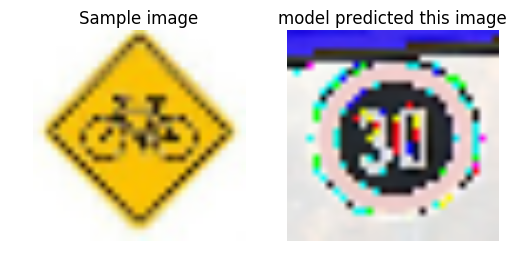

In [18]:
compare_image_against_model('Sample5.jpg')

In [19]:
compare_image_against_model('Sample6.jpg')

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model predicted 14


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

I'm more of a visual person so I prefer to show the input image and the predicted image side by side. 1 of 6 images were accurate (16%). The stop sign was the most successful. However, the model did a good job of tracking the arrows, triangles and shapes even if the sign isn't in the training set.

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import pandas as pd
sign_names = pd.read_csv('signnames.csv')

def compute_prediction_certainty(img):
    image = mpimg.imread(img)
    resized_image = cv2.resize(image, (32, 32)) 
    print('This image is:', type(resized_image), 'with dimesions:', resized_image.shape)
    plt.figure(figsize=(15,15))
    predicted_plot = plt.subplot(1,6,1)
    predicted_plot.set_title("Sample image")
    plt.imshow(resized_image)
    plt.axis('off')
    certainty = sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=5), feed_dict={x: [resized_image]})
    print("model certainty", certainty)
    for single_certainty in certainty[1][0]:
        print(single_certainty, " - ", sign_names.loc[single_certainty]['SignName'])
        i = 2
        #reference_plot.set_title("model predicted this image")
        for index in range(n_train):
            if single_certainty == (y_train[index]):
                image = X_train[index]
                plt.figure(figsize=(15,15))
                plt.subplot(1,6,i)
                plt.axis('off')
                plt.imshow(image)
                break
        i = i + 1        
        plt.show()
    return certainty

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model certainty TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[3, 0, 1, 2, 4]]))
3  -  Speed limit (60km/h)


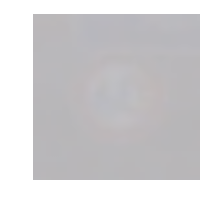

0  -  Speed limit (20km/h)


1  -  Speed limit (30km/h)


2  -  Speed limit (50km/h)


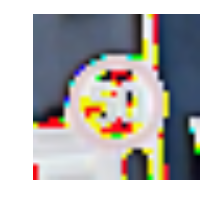

4  -  Speed limit (70km/h)


TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[3, 0, 1, 2, 4]]))

In [21]:
compute_prediction_certainty('sample1b.jpg')

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model certainty TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[1, 0, 2, 3, 4]]))
1  -  Speed limit (30km/h)


0  -  Speed limit (20km/h)


2  -  Speed limit (50km/h)


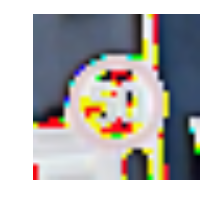

3  -  Speed limit (60km/h)


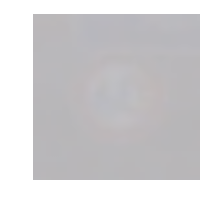

4  -  Speed limit (70km/h)


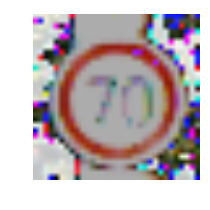

TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[1, 0, 2, 3, 4]]))

In [22]:
compute_prediction_certainty('sample2b.jpg')

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model certainty TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[34,  0,  1,  2,  3]]))
34  -  Turn left ahead


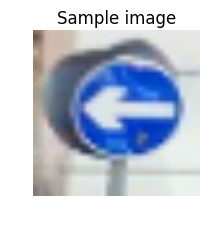

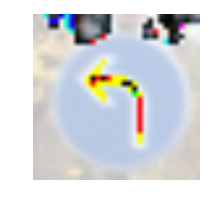

0  -  Speed limit (20km/h)


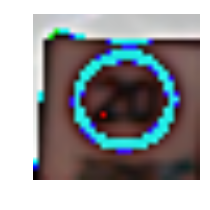

1  -  Speed limit (30km/h)


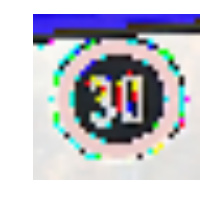

2  -  Speed limit (50km/h)


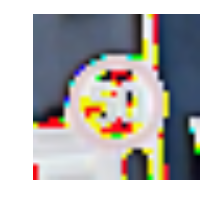

3  -  Speed limit (60km/h)


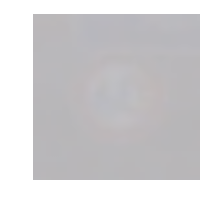

TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[34,  0,  1,  2,  3]]))

In [23]:
compute_prediction_certainty('sample3b.jpg')

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model certainty TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[3, 0, 1, 2, 4]]))
3  -  Speed limit (60km/h)


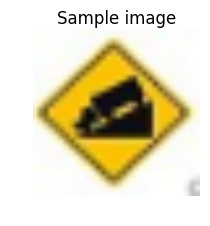

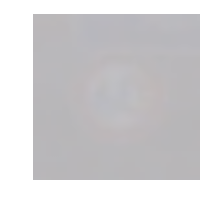

0  -  Speed limit (20km/h)


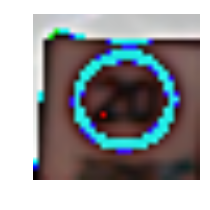

1  -  Speed limit (30km/h)


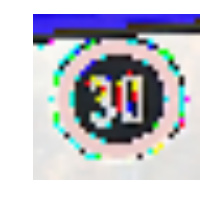

2  -  Speed limit (50km/h)


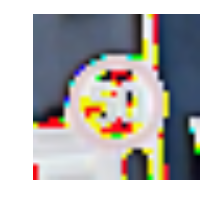

4  -  Speed limit (70km/h)


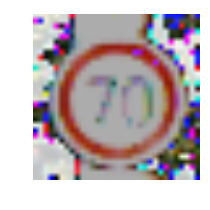

TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[3, 0, 1, 2, 4]]))

In [24]:
compute_prediction_certainty('sample4b.jpg')

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model certainty TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[1, 0, 2, 3, 4]]))
1  -  Speed limit (30km/h)


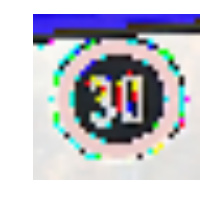

0  -  Speed limit (20km/h)


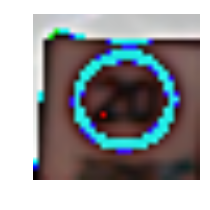

2  -  Speed limit (50km/h)


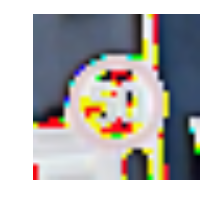

3  -  Speed limit (60km/h)


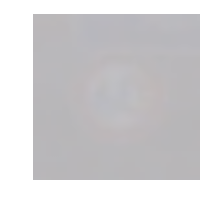

4  -  Speed limit (70km/h)


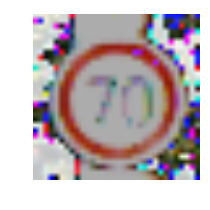

TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[1, 0, 2, 3, 4]]))

In [25]:
compute_prediction_certainty('sample5b.jpg')

This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
model certainty TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[14,  0,  1,  2,  3]]))
14  -  Stop


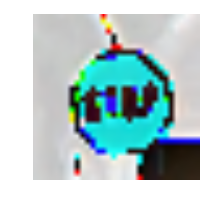

0  -  Speed limit (20km/h)


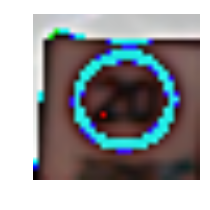

1  -  Speed limit (30km/h)


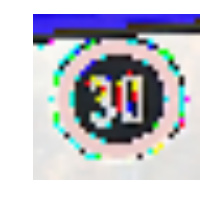

2  -  Speed limit (50km/h)


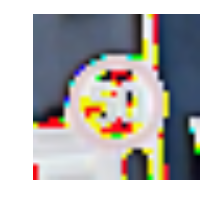

3  -  Speed limit (60km/h)


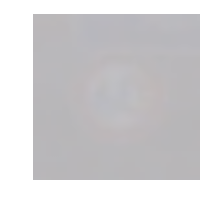

TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[14,  0,  1,  2,  3]]))

In [26]:
compute_prediction_certainty('sample6b.jpg')

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In general, the model was certain of all the top picks even though accuracy was 16%. I attribute this to the fact that the model has a 97% accuracy on the training data so it's very confident even when it's wrong. This reminds me of the early days of speech recognition using score and confidence to determine the word spoken. Fro example, when trying to speak the numbers to dial a phone, this was largely dependent on the speaker and environment. The speaker could speak English natively but has a strong southern accent and not be recognized while a non-native speaker could have no problems at all. It depended on the training set used for the speech recognition model. Similarly, images could be noisy, not contain enough information or not have a large enough training set for the model.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [27]:
sess.close()